<a href="https://colab.research.google.com/github/sawzwe/Emotion-Classification-/blob/main/EmotionClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Load Data

In [ ]:
train_dir = './data/train'
test_dir = './data/test'
validation_dir = './data/val'

In [ ]:
# Define image dimensions and batch size
img_width, img_height = 256, 256
batch_size = 32

In [ ]:
# Create data generators with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    classes=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
)

Found 3716 images belonging to 7 classes.


In [ ]:
validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    classes=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
)

Found 388 images belonging to 7 classes.


In [ ]:
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    classes=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
)

Found 388 images belonging to 7 classes.


# Model

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Output layer with 7 units

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
# Define a learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.001  # Initial learning rate
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1  # Reduce learning rate after 10 epochs

In [ ]:
# Create a learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

In [ ]:
# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Stop after 5 epochs without improvement
    restore_best_weights=True
)

In [ ]:
# Train the model
num_epochs = 60
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    # Train the model on the training data
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        epochs=1,  # Train for 1 epoch at a time
        verbose=1,
        callbacks=[early_stopping]
    )
    # Collect and store training and validation losses for this epoch
    train_losses.append(history.history['loss'][0])
    val_losses.append(history.history['val_loss'][0])

    # Collect and store training and validation accuracies for this epoch
    train_accuracies.append(history.history['accuracy'][0])
    val_accuracies.append(history.history['val_accuracy'][0])

    # Calculate validation accuracy
    val_loss, val_accuracy = model.evaluate(validation_generator, verbose=0)
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Epoch 1/60
117/117 [==============================] - 58s 491ms/step - loss: 1.8795 - accuracy: 0.2422 - val_loss: 1.8405 - val_accuracy: 0.2887
Validation Accuracy: 28.87%
Epoch 2/60
117/117 [==============================] - 57s 487ms/step - loss: 1.8693 - accuracy: 0.2487 - val_loss: 1.8377 - val_accuracy: 0.2784
Validation Accuracy: 27.84%
Epoch 3/60
117/117 [==============================] - 57s 484ms/step - loss: 1.8601 - accuracy: 0.2497 - val_loss: 1.8116 - val_accuracy: 0.2912
Validation Accuracy: 29.12%
Epoch 4/60
117/117 [==============================] - 57s 489ms/step - loss: 1.8562 - accuracy: 0.2468 - val_loss: 1.8028 - val_accuracy: 0.2861
Validation Accuracy: 28.61%
Epoch 5/60
117/117 [==============================] - 58s 493ms/step - loss: 1.8570 - accuracy: 0.2543 - val_loss: 1.7967 - val_accuracy: 0.3144
Validation Accuracy: 31.44%
Epoch 6/60
117/117 [==============================] - 59s 500ms/step - loss: 1.8506 - accuracy: 0.2616 - val_loss: 1.7824 - val_accurac

# Evaluation

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
fig = plt.figure()
plt.plot(train_losses, color='teal', label='Training Loss')
plt.plot(val_losses, color='orange', label='Validation Loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper right")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(train_accuracies, color='teal', label='Training Accuracy')
plt.plot(val_accuracies, color='orange', label='Validation Accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

# Test

In [ ]:
import cv2

In [ ]:
image_path = test_dir + '/Happy/7.png'

In [ ]:
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

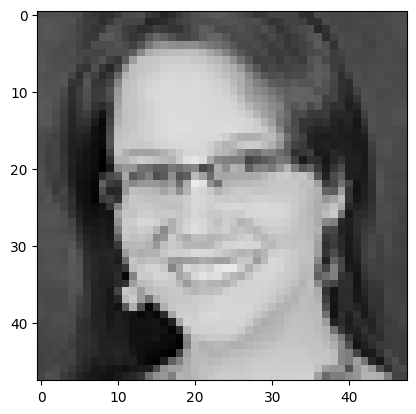

In [ ]:
plt.imshow(img)
plt.show()

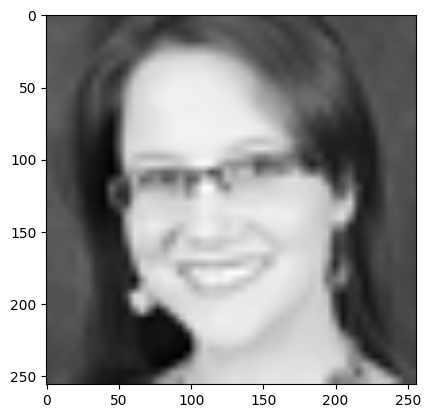

In [ ]:
resize = tf.image.resize(img, (256, 256))
grayscale = tf.image.rgb_to_grayscale(resize)
plt.imshow(grayscale.numpy().squeeze(), cmap='gray')
plt.show()

In [ ]:
import numpy as np

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))
print(yhat)

1/1 [==============================] - 0s 19ms/step
[[0.09411012 0.06535713 0.10185181 0.2269292  0.3009489  0.09605891
  0.11474401]]


In [ ]:
if np.any(yhat > 0.2):
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is something else')

Predicted class is Happy


In [ ]:
# Read the image using cv2.imread
img = cv2.imread(image_path)

# Resize the image to match the input size used during training
resize = tf.image.resize(img, (256, 256))

# Make predictions for the resized image
predictions = model.predict(np.expand_dims(resize/255, 0))

# Interpret the predictions for binary classification
predicted_class_label = "Happy" if predictions[0][0] < 0.5 else "something"

# Display the predicted class label
print(f'Predicted class is {predicted_class_label}')

1/1 [==============================] - 0s 22ms/step
Predicted class is Happy
